In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV, KFold
from sklearn.model_selection import learning_curve,LearningCurveDisplay, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('tasa de falsos positivos')
    plt.xlabel('tasa de positivos verdaderos')

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X_trainval, y_trainval, axes = None, ylim = None, cv = None, n_jobs = None,
                        scoring = None, label = None,  train_sizes = np.linspace(.1, 1.0, 15)):
    if axes is None:
        _, axes = plt.subplots(1,2,figsize= (20,5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel('training examples')
    axes[0].set_ylabel('scores')

    train_sizes, train_scores, test_scores = learning_curve(
                    estimator, X,y,cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring=scoring)



    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    #plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha = 0.1,
                         color = 'r')
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha = 0.1,
                         color = 'r')
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'training ' + label)
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'test ' + label)
    axes[0].legend(loc='best')

    return plt


In [ ]:
input_file = 'database.csv'
array = np.loadtxt(input_file , delimiter = ';', dtype= float)
dataset = {
    'data': array[:,:-1],
    'etiquetas' : array[:,-1],
    'nombre etiquetas':['Fibrilación auricular', 'Ritmo sinusal normal'],
    'caracteristicas': ['RR_mean', 'rmssd', 'SDSD', 'SDRR', 'nn_50', 'DAM', 'SD1', 'SD2']
}

data = dataset['data']
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)
y = dataset['etiquetas']
print(X)
print(y)

[[-0.5968512  -0.20469511 -0.13476451 ... -0.10036714 -0.2433591
  -0.04782158]
 [-0.545655   -0.29304404 -0.26758238 ... -0.16688744 -0.35157765
  -0.12266502]
 [-0.67475845 -0.27144355 -0.22519224 ... -0.20940925 -0.27196786
  -0.07588787]
 ...
 [-0.75489163 -0.48091253 -0.07978412 ... -0.33165779 -0.5583196
  -0.74947877]
 [-0.66808069 -0.18251118  0.1632207  ... -0.14963728 -0.15928503
  -0.48752675]
 [-0.67030661 -0.61579263 -0.29042576 ... -0.47804336 -0.68041414
  -0.85238849]]
[1. 1. 1. ... 0. 0. 0.]


In [ ]:
dataframe = pd.DataFrame(X, columns= ['RR_mean', 'rmssd', 'SDSD', 'SDRR', 'nn_50', 'DAM', 'SD1', 'SD2'])
etiq = pd.DataFrame(y, columns = ['etiquetas'])
print(dataframe, etiq)

       RR_mean     rmssd      SDSD      SDRR     nn_50       DAM       SD1  \
0    -0.596851 -0.204695 -0.134765 -0.100547  0.836762 -0.100367 -0.243359   
1    -0.545655 -0.293044 -0.267582 -0.167043  0.815518 -0.166887 -0.351578   
2    -0.674758 -0.271444 -0.225192 -0.209569  0.601320 -0.209409 -0.271968   
3    -0.559011 -0.069441  0.000994  0.115536  1.046607  0.115745 -0.192899   
4    -0.516718 -0.071795  0.060114  0.114291  0.929461  0.114524 -0.193640   
...        ...       ...       ...       ...       ...       ...       ...   
3990 -0.743762 -0.343004  0.109926 -0.190332 -1.038095 -0.190167 -0.426002   
3991 -0.763795 -0.674733 -0.354076 -0.532910 -1.167588 -0.532828 -0.742605   
3992 -0.754892 -0.480913 -0.079784 -0.331792 -1.103225 -0.331658 -0.558320   
3993 -0.668081 -0.182511  0.163221 -0.149807 -1.026323 -0.149637 -0.159285   
3994 -0.670307 -0.615793 -0.290426 -0.478139 -1.161510 -0.478043 -0.680414   

           SD2  
0    -0.047822  
1    -0.122665  
2    -0.0758

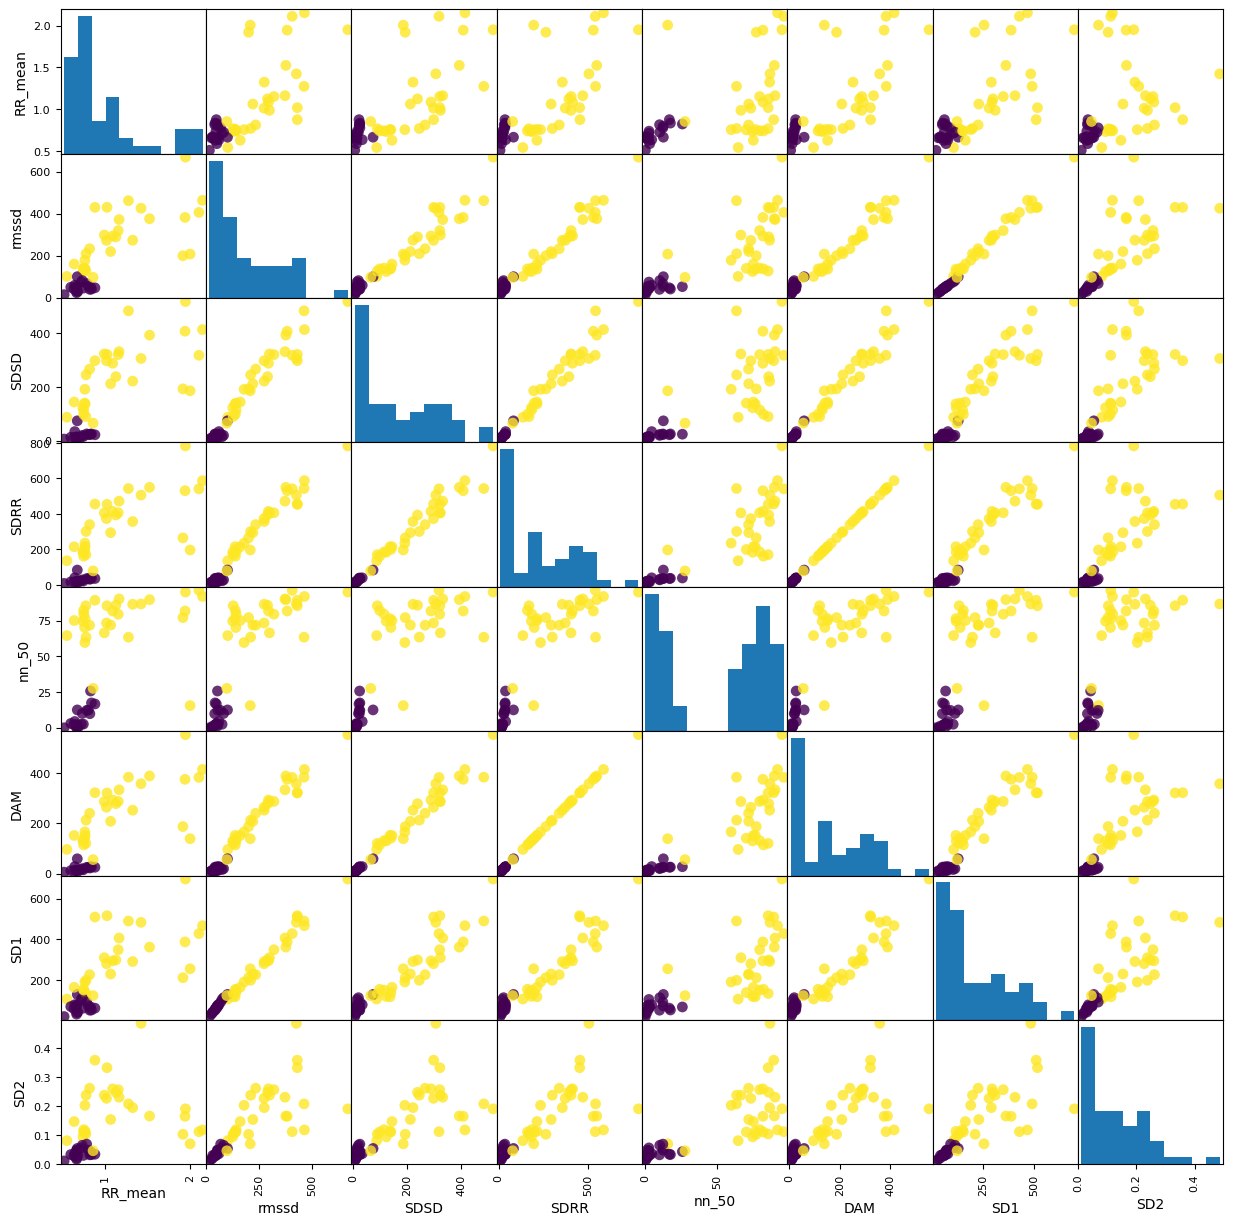

In [ ]:
import random
aux = np.empty((50,9))
for m in range(50):
    i = random.randint(0,3995)
    aux[m,] = array[i]
aux_df = pd.DataFrame(aux[:,:-1], columns = dataset['caracteristicas'])
grr = pd.plotting.scatter_matrix(aux_df, c=aux[:,-1], figsize=(15,15), marker = 'o', s=60, alpha=.8)

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(dataset['data'], dataset['etiquetas'])
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)
print("Size of training set: {} size of validation set: {} size of test set:  {}\n".format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))


Size of training set: 2247 size of validation set: 749 size of test set:  999



In [ ]:
#defino los parametros para el grid search para cada clasificador
param_grid_logreg = {
    'C': [ 0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1','l2'],
    'solver': ['liblinear']

}

param_grid_svm = {
    'C' : [ 0.001, 0.01, 0.1,1,10],
    'gamma' : [ 0.001, 0.001, 0.01, 0.1,1,10],
    'kernel' : ['linear']


}

param_grid_forest = {

    'n_estimators' : [5,10,15,20],
    'max_depth' : [1,2,3,4,5],
    'min_samples_split': [2, 3, 4, 5],
    'max_features': ['sqrt', 'log2']


}

param_grid_AdaBoost = {
    'n_estimators' : [5,10,15,20],
    'learning_rate' :  [0.001, 0.01, 0.1,1,10],
    'base_estimator' : [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=4)]

}

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights' : ['uniform', 'distance']
}


kfold = KFold(n_splits=10, shuffle = True, random_state = 42)

print('logreg: {} \n'.format(param_grid_logreg))
print('svm: {} \n'.format(param_grid_svm))
print('forest: {} \n'.format(param_grid_forest))
print('AdaBoost: {} \n'.format(param_grid_AdaBoost))
print('k-neighbors: {} \n'.format(param_grid_knn))

logreg: {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']} 

svm: {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']} 

forest: {'n_estimators': [5, 10, 15, 20], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5], 'max_features': ['sqrt', 'log2']} 

AdaBoost: {'n_estimators': [5, 10, 15, 20], 'learning_rate': [0.001, 0.01, 0.1, 1, 10], 'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=4)]} 

k-neighbors: {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']} 



In [ ]:
print('svm grid search')

svm_clf = SVC()
grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=kfold, verbose=3)
grid_search_svm.fit(X_trainval, y_trainval)
best_params_svm = grid_search_svm.best_params_


print('logreg grid search')

logreg_clf = LogisticRegression()
grid_search_logreg = GridSearchCV(logreg_clf, param_grid_logreg, cv=kfold, verbose=3)
grid_search_logreg.fit(X_trainval, y_trainval)
best_params_logreg = grid_search_logreg.best_params_


svm grid search
Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.973 total time=   0.5s
[CV 2/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.960 total time=   0.5s
[CV 3/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.947 total time=   0.3s
[CV 4/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.963 total time=   0.3s
[CV 5/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.960 total time=   0.2s
[CV 6/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.970 total time=   0.4s
[CV 7/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.963 total time=   0.3s
[CV 8/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.933 total time=   0.2s
[CV 9/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.960 total time=   0.2s
[CV 10/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.973 total time=   0.4s
[CV 1/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.973 total time=   0.4s
[CV 2/1

[CV 1/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.980 total time=   1.2s
[CV 2/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   1.0s
[CV 3/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.947 total time=   0.9s
[CV 4/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.967 total time=   1.2s
[CV 5/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   1.4s
[CV 6/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.973 total time=   1.0s
[CV 7/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.963 total time=   1.1s
[CV 8/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.933 total time=   1.1s
[CV 9/10] END ...C=0.01, gamma=1, kernel=linear;, score=0.960 total time=   1.1s
[CV 10/10] END ..C=0.01, gamma=1, kernel=linear;, score=0.973 total time=   1.3s
[CV 1/10] END ..C=0.01, gamma=10, kernel=linear;, score=0.980 total time=   1.1s
[CV 2/10] END ..C=0.01, gamma=10, kernel=linear;, score=0.960 total time=   0.9s
[CV 3/10] END ..C=0.01, gamm

[CV 3/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.950 total time=  51.9s
[CV 4/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.963 total time=  55.2s
[CV 5/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.960 total time=  52.3s
[CV 6/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.970 total time=  58.5s
[CV 7/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.970 total time=  55.9s
[CV 8/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.930 total time=  56.9s
[CV 9/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.963 total time=  53.9s
[CV 10/10] END ..C=1, gamma=0.01, kernel=linear;, score=0.970 total time=  57.0s
[CV 1/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.983 total time=  52.0s
[CV 2/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.950 total time=  59.4s
[CV 3/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.950 total time=  52.9s
[CV 4/10] END ....C=1, gamma=0.1, kernel=linear;, score=0.963 total time=  55.8s
[CV 5/10] END ....C=1, gamma

[CV 4/10] END C=0.001, penalty=l1, solver=liblinear;, score=0.893 total time=   0.0s
[CV 5/10] END C=0.001, penalty=l1, solver=liblinear;, score=0.860 total time=   0.0s
[CV 6/10] END C=0.001, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 7/10] END C=0.001, penalty=l1, solver=liblinear;, score=0.900 total time=   0.0s
[CV 8/10] END C=0.001, penalty=l1, solver=liblinear;, score=0.896 total time=   0.0s
[CV 9/10] END C=0.001, penalty=l1, solver=liblinear;, score=0.930 total time=   0.0s
[CV 10/10] END C=0.001, penalty=l1, solver=liblinear;, score=0.910 total time=   0.0s
[CV 1/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.917 total time=   0.0s
[CV 2/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.920 total time=   0.0s
[CV 3/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.917 total time=   0.0s
[CV 4/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.923 total time=   0.0s
[CV 5/10] END C=0.001, penalty=l2, solver=liblinear;, score=0.89

[CV 4/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.980 total time=   0.0s
[CV 5/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.967 total time=   0.0s
[CV 6/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.963 total time=   0.0s
[CV 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.973 total time=   0.0s
[CV 8/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.963 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.973 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.983 total time=   0.0s
[CV 1/10] END max_depth=None, max

[CV 4/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.970 total time=   0.0s
[CV 5/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.990 total time=   0.0s
[CV 6/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.970 total time=   0.0s
[CV 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.967 total time=   0.0s
[CV 8/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.963 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.970 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.983 total time=   0.0s
[CV 1/10] END max_depth=No

[CV 5/10] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.973 total time=   0.0s
[CV 6/10] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.983 total time=   0.0s
[CV 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.970 total time=   0.0s
[CV 8/10] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.967 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.977 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.983 total time=   0.0s
[CV 1/10] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2;, score=0.970 total time=   0.0s
[CV 2/10] END max_depth=None, max

[CV 5/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.960 total time=   0.0s
[CV 6/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.970 total time=   0.0s
[CV 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.970 total time=   0.0s
[CV 8/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.950 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.960 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.967 total time=   0.0s
[CV 1/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2;, score=0.980 total time=   0.0s
[CV 2/10] END max_depth=None, max

[CV 6/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.970 total time=   0.0s
[CV 7/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.983 total time=   0.0s
[CV 8/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.953 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.983 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.963 total time=   0.0s
[CV 1/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2;, score=0.983 total time=   0.0s
[CV 2/10] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2;, score=0.987 total time=   0.0s
[CV 3/10] END max_depth=No

[CV 6/10] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=0.977 total time=   0.0s
[CV 7/10] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=0.977 total time=   0.0s
[CV 8/10] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=0.973 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=0.983 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=0.987 total time=   0.0s
[CV 1/10] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2;, score=0.980 total time=   0.0s
[CV 2/10] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2;, score=0.980 total time=   0.0s
[CV 3/10] END max_depth=None, max

[CV 8/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=0.970 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=0.977 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=0.973 total time=   0.0s
[CV 1/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2;, score=0.983 total time=   0.0s
[CV 2/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2;, score=0.980 total time=   0.0s
[CV 3/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2;, score=0.987 total time=   0.0s
[CV 4/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=2;, score=0.983 total time=   0.0s
[CV 5/10] END max_depth=None, max

[CV 8/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=0.950 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=0.973 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=0.977 total time=   0.0s
[CV 1/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2;, score=0.977 total time=   0.0s
[CV 2/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2;, score=0.970 total time=   0.0s
[CV 3/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2;, score=0.980 total time=   0.0s
[CV 4/10] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=2;, score=0.960 total time=   0.0s
[CV 5/10] END max_depth=No

[CV 8/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1;, score=0.953 total time=   0.0s
[CV 9/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1;, score=0.973 total time=   0.0s
[CV 10/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1;, score=0.970 total time=   0.0s
[CV 1/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2;, score=0.983 total time=   0.0s
[CV 2/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2;, score=0.987 total time=   0.0s
[CV 3/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2;, score=0.970 total time=   0.0s
[CV 4/10] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=2;, score=0.980 total time=   0.0s
[CV 5/10] END max_depth=None, max

[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.967 total time=   0.0s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.987 total time=   0.0s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.977 total time=   0.0s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.973 total time=   0.0s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.983 total time=   0.0s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.973 total time=   0.0s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.970 total time=   0.0s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samp

[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2;, score=0.967 total time=   0.0s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2;, score=0.970 total time=   0.0s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2;, score=0.977 total time=   0.0s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2;, score=0.973 total time=   0.0s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2;, score=0.977 total time=   0.0s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2;, score=0.950 total time=   0.0s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2;, score=0.980 total time=   0.0s
[CV 10/10] END max_depth=5, max_features=sqrt, m

[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2;, score=0.973 total time=   0.0s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2;, score=0.993 total time=   0.0s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2;, score=0.963 total time=   0.0s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2;, score=0.973 total time=   0.0s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2;, score=0.970 total time=   0.0s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.970 total time=   0.1s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.973 total time=   0.1s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samp

[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2;, score=0.963 total time=   0.0s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2;, score=0.983 total time=   0.0s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.983 total time=   0.1s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.963 total time=   0.1s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.973 total time=   0.1s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.977 total time=   0.1s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.990 total time=   0.1s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samp

[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2;, score=0.980 total time=   0.0s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.973 total time=   0.1s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.967 total time=   0.1s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.970 total time=   0.1s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.977 total time=   0.1s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.973 total time=   0.1s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.970 total time=   0.1s
[CV 7/10] END max_depth=5, max_features=sqrt, m

[CV 1/10] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.980 total time=   0.1s
[CV 2/10] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.977 total time=   0.1s
[CV 3/10] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.970 total time=   0.1s
[CV 4/10] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.990 total time=   0.1s
[CV 5/10] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.983 total time=   0.1s
[CV 6/10] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.973 total time=   0.1s
[CV 7/10] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.987 total time=   0.1s
[CV 8/10] END max_depth=5, max_features=log2, min_sampl

[CV 2/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.973 total time=   0.1s
[CV 3/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.970 total time=   0.1s
[CV 4/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.987 total time=   0.1s
[CV 5/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.990 total time=   0.1s
[CV 6/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.977 total time=   0.1s
[CV 7/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.987 total time=   0.1s
[CV 8/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.950 total time=   0.1s
[CV 9/10] END max_depth=5, max_features=log2, min_sampl

[CV 3/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.970 total time=   0.1s
[CV 4/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.987 total time=   0.1s
[CV 5/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.980 total time=   0.1s
[CV 6/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.987 total time=   0.1s
[CV 7/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.983 total time=   0.1s
[CV 8/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.970 total time=   0.1s
[CV 9/10] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.980 total time=   0.1s
[CV 10/10] END max_depth=5, max_features=log2, m

[CV 4/10] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.990 total time=   0.1s
[CV 5/10] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.983 total time=   0.1s
[CV 6/10] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.973 total time=   0.1s
[CV 7/10] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.977 total time=   0.1s
[CV 8/10] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.950 total time=   0.1s
[CV 9/10] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.973 total time=   0.1s
[CV 10/10] END max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.990 total time=   0.1s
[CV 1/10] END max_depth=5, max_features=log2, min_samp

[CV 5/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.983 total time=   0.1s
[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.987 total time=   0.1s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.990 total time=   0.1s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.960 total time=   0.1s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.977 total time=   0.1s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.983 total time=   0.1s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1;, score=0.970 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=sqrt, 

[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.993 total time=   0.1s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.970 total time=   0.1s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.980 total time=   0.1s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5;, score=0.983 total time=   0.1s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=0.977 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=0.963 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1;, score=0.980 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=sq

[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.967 total time=   0.1s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.980 total time=   0.1s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.980 total time=   0.1s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=0.957 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=0.957 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=0.960 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1;, score=0.973 total time=   0.0s
[CV 5/10] END max_depth=10, max_features=sq

[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.970 total time=   0.1s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.987 total time=   0.1s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.987 total time=   0.1s
[CV 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1;, score=0.980 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1;, score=0.943 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1;, score=0.973 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1;, score=0.980 total time=   0.0s
[CV 5/10] END max_depth=10, max_features=sqrt, 

[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.967 total time=   0.1s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.980 total time=   0.1s
[CV 10/10] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5;, score=0.980 total time=   0.1s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.963 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.973 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.973 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1;, score=0.973 total time=   0.0s
[CV 5/10] END max_depth=10, max_features=log

[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.987 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=5;, score=0.993 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.960 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.963 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.970 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.980 total time=   0.0s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1;, score=0.977 total time=   0.0s
[CV 6/10] END max_depth=10, max_features=l

[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.983 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=5;, score=0.983 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.970 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.970 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.967 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.990 total time=   0.0s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1;, score=0.997 total time=   0.0s
[CV 6/10] END max_depth=10, max_features=log2, 

[CV 9/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.987 total time=   0.2s
[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5;, score=0.990 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.970 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.960 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.963 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.980 total time=   0.0s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1;, score=0.977 total time=   0.0s
[CV 6/10] END max_depth=10, max_features=log2

[CV 10/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5;, score=0.987 total time=   0.2s
[CV 1/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.983 total time=   0.0s
[CV 2/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.960 total time=   0.0s
[CV 3/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.970 total time=   0.0s
[CV 4/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.980 total time=   0.0s
[CV 5/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.993 total time=   0.0s
[CV 6/10] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1;, score=0.973 total time=   0.0s
[CV 7/10] END max_depth=10, max_features=

C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=1;, score=0.960 total time=   0.0s
[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=1;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=1;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=1;, score=0.940 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=1;, score=0.933 total time=   0.0s
[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=1;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=1;, score=0.970 total time=   0.0s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.953 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.960 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.940 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.933 total time=   0.0s
[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.970 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.950 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.960 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.940 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.940 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.933 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.950 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.0001, n_estimators=5;, score=0.970 total time=   0.1s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.970 total time=   0.0s
[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.953 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.960 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warni

[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.940 total time=   0.0s
[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.933 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=1;, score=0.970 total time=   0.0s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.953 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.960 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.940 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.933 total time=   0.0s
[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.970 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.950 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.960 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.940 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.940 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.933 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.950 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.001, n_estimators=5;, score=0.970 total time=   0.1s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.970 total time=   0.0s
[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.953 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.960 total time=   0.0s
[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.940 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.933 total time=   0.0s
[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=1;, score=0.970 total time=   0.0s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warni

[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.953 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.960 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.940 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.933 total time=   0.0s
[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.970 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.950 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.960 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.940 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.940 total time=   0.1s
[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.933 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.950 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=5;, score=0.970 total time=   0.1s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.970 total time=   0.0s
[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.953 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.960 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warni

[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.940 total time=   0.0s
[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.933 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=1;, score=0.970 total time=   0.0s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.953 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.960 total time=   0.0s
[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.940 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.933 total time=   0.0s
[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=2;, score=0.970 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.970 total time=   0.1s
[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.957 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.967 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.957 total time=   0.1s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.953 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.936 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.957 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=5;, score=0.970 total time=   0.1s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.970 total time=   0.0s
[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.950 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.953 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.960 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warni

[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.953 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.940 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.940 total time=   0.0s
[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.933 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.950 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=1;, score=0.970 total time=   0.0s
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.953 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.933 total time=   0.0s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.930 total time=   0.0s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.943 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.937 total time=   0.0s
[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.950 total time=   0.0s
[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.960 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.916 total time=   0.0s
[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.960 total time=   0.0s
[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=2;, score=0.967 total time=   0.0s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.977 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.963 total time=   0.1s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.930 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.963 total time=   0.1s
[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.967 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 6/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.963 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 7/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.973 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 8/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.940 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 9/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.963 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 10/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1, n_estimators=5;, score=0.983 total time=   0.1s


C:\Users\lapto thinkpad\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


k-neigbors grid search
Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ....................n_neighbors=1;, score=0.963 total time=   0.0s
[CV 2/10] END ....................n_neighbors=1;, score=0.963 total time=   0.0s
[CV 3/10] END ....................n_neighbors=1;, score=0.957 total time=   0.0s
[CV 4/10] END ....................n_neighbors=1;, score=0.943 total time=   0.0s
[CV 5/10] END ....................n_neighbors=1;, score=0.967 total time=   0.0s
[CV 6/10] END ....................n_neighbors=1;, score=0.957 total time=   0.0s
[CV 7/10] END ....................n_neighbors=1;, score=0.967 total time=   0.0s
[CV 8/10] END ....................n_neighbors=1;, score=0.930 total time=   0.0s
[CV 9/10] END ....................n_neighbors=1;, score=0.963 total time=   0.0s
[CV 10/10] END ...................n_neighbors=1;, score=0.967 total time=   0.0s
[CV 1/10] END ....................n_neighbors=3;, score=0.970 total time=   0.0s
[CV 2/10] END ...........

In [ ]:
param_grid_forest = {
    'max_depth' : [140,150,160,170],
    'max_features': ['sqrt', 'log2', 0.5, 1],
    'min_samples_split': [10,30,50,70,100],
    'n_estimators' : [170,200,250,300]

}

print('forest grid search')

forest_clf = RandomForestClassifier()
grid_search_forest = GridSearchCV(forest_clf, param_grid_forest, cv=5, verbose=3)
grid_search_forest.fit(X_trainval, y_trainval)
best_params_forest = grid_search_forest.best_params_
print("mejores hiperparametros forest :", best_params_forest)

forest grid search
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV 1/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=170;, score=0.988 total time=   1.3s
[CV 2/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=170;, score=0.988 total time=   2.9s
[CV 3/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=170;, score=0.980 total time=   2.2s
[CV 4/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=170;, score=0.985 total time=   0.7s
[CV 5/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=170;, score=0.985 total time=   0.8s
[CV 1/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.988 total time=   0.8s
[CV 2/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=200;, score=0.988 total time=   0.8s
[CV 3/5] END max_depth=140, max_features=sqrt, min_samples_split=10, n_estimators=20

In [ ]:
print('k-neigbors grid search')

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=kfold, verbose = 3)
grid_search_knn.fit(X_trainval, y_trainval)
best_params_knn = grid_search_knn.best_params_

k-neigbors grid search
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ...n_neighbors=5, weights=uniform;, score=0.980 total time=   0.0s
[CV 2/10] END ...n_neighbors=5, weights=uniform;, score=0.953 total time=   0.0s
[CV 3/10] END ...n_neighbors=5, weights=uniform;, score=0.987 total time=   0.0s
[CV 4/10] END ...n_neighbors=5, weights=uniform;, score=0.967 total time=   0.0s
[CV 5/10] END ...n_neighbors=5, weights=uniform;, score=0.980 total time=   0.0s
[CV 6/10] END ...n_neighbors=5, weights=uniform;, score=0.960 total time=   0.0s
[CV 7/10] END ...n_neighbors=5, weights=uniform;, score=0.957 total time=   0.0s
[CV 8/10] END ...n_neighbors=5, weights=uniform;, score=0.960 total time=   0.0s
[CV 9/10] END ...n_neighbors=5, weights=uniform;, score=0.977 total time=   0.0s
[CV 10/10] END ..n_neighbors=5, weights=uniform;, score=0.967 total time=   0.0s
[CV 1/10] END ..n_neighbors=5, weights=distance;, score=0.977 total time=   0.0s
[CV 2/10] END ..n_neigh

In [ ]:
param_grid_AdaBoost = {
    'n_estimators' : [250,300,350,400],
    'learning_rate' :  [0.01, 0.1,0.5,1,1.5],
    'estimator' : [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]

}

print('AdaBoost grid search')

AdaBoost_clf = AdaBoostClassifier()
grid_search_AdaBoost = GridSearchCV(AdaBoost_clf, param_grid_AdaBoost, cv=kfold, verbose=3)
grid_search_AdaBoost.fit(X_trainval, y_trainval)
best_params_AdaBoost = grid_search_AdaBoost.best_params_


In [ ]:
svm_clf = SVC(C = 0.01, gamma = 0.001, kernel = 'linear')
svm_scores = cross_val_score(svm_clf, X_trainval, y_trainval, cv=kfold)
mean_cross_val_score = np.mean(svm_scores)
print("Cross-Validation Mean Score:", mean_cross_val_score)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)


print("Accuracy svm: {:.3f}".format(accuracy))
print("Precision svm: {:.3f}".format(precision))
print("Recall svm: {:.3f}".format(recall))
print("F1 Score svm: {:.3f}".format(f1))
print('confusion matrix svm: \n{}\n'.format(confusion_matrix(y_test,  y_pred_svm)))

Cross-Validation Mean Score: 0.9599464882943144
Accuracy svm: 0.959
Precision svm: 0.954
Recall svm: 0.956
F1 Score svm: 0.955
confusion matrix svm: 
[[519  21]
 [ 20 439]]



In [ ]:
logreg_clf = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
logreg_scores = cross_val_score(logreg_clf, X_trainval, y_trainval, cv=kfold)
mean_cross_val_score = np.mean(logreg_scores)
print("Cross-Validation Mean Score:", mean_cross_val_score)
logreg_clf.fit(X_train, y_train)
y_pred_logreg = logreg_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)


print("Accuracy logreg: {:.3f}".format(accuracy))
print("Precision logreg: {:.3f}".format(precision))
print("Recall logreg: {:.3f}".format(recall))
print("F1 Score logreg: {:.3f}".format(f1))
print('confusion matrix logreg: \n{}\n'.format(confusion_matrix(y_test,  y_pred_logreg)))

Cross-Validation Mean Score: 0.960283166109253
Accuracy logreg: 0.957
Precision logreg: 0.954
Recall logreg: 0.952
F1 Score logreg: 0.953
confusion matrix logreg: 
[[519  21]
 [ 22 437]]



In [ ]:
#150,sqrt,50,200
#forest_clf = RandomForestClassifier(**best_params_forest)

forest_clf = RandomForestClassifier( max_depth = 135,
                                    max_features= 'sqrt',
                                    min_samples_split = 50,
                                    n_estimators = 200)

forest_clf.fit(X_trainval, y_trainval)

features_importances = forest_clf.feature_importances_
feature_selector = SelectFromModel(forest_clf)
X_train_selected = feature_selector.fit_transform(X_trainval,y_trainval)
ensemble_classifier = BaggingClassifier(estimator=forest_clf, n_estimators=20)


forest_scores = cross_val_score(ensemble_classifier, X_train_selected, y_trainval, cv=kfold)
mean_cross_val_score = np.mean(forest_scores)

print("Cross-Validation Mean Score :", mean_cross_val_score)

ensemble = ensemble_classifier.fit(X_train, y_train)

y_pred_forest = ensemble_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)

train_score_forest = ensemble_classifier.score(X_train, y_train)
test_score_forest = ensemble_classifier.score(X_test, y_test)
print('training score: {:.3f}'.format( train_score_forest))
print('test score: {:.3f}'.format( test_score_forest))


print("Accuracy Forest: {:.3f}".format(accuracy))
print("Precision Forest: {:.3f}".format(precision))
print("Recall Forest: {:.3f}".format(recall ))
print("F1 Score Forest: {:.3f}".format(f1 ))
print('confusion matrix Forest: \n{}\n'.format(confusion_matrix(y_test,  y_pred_forest)))

#======================================================================
#plot_learning_curve(ensemble, 'random forest', X,y, ylim=(0.8,1.01), cv = kfold, n_jobs = 4, scoring = 'accuracy', label='accuracy' )
#nivel de computo muy exigente

Cross-Validation Mean Score : 0.9579431438127092
training score: 0.979
test score: 0.969
Accuracy Forest: 0.969
Precision Forest: 0.976
Recall Forest: 0.956
F1 Score Forest: 0.966
confusion matrix Forest: 
[[529  11]
 [ 20 439]]



In [ ]:
AdaBoost_clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=1), learning_rate = 0.05, n_estimators = 150)
AdaBoost_scores = cross_val_score(AdaBoost_clf , X_trainval, y_trainval, cv = kfold)
mean_cross_val_score = np.mean(AdaBoost_scores)
AdaBoost_clf.fit(X_train, y_train)
y_pred_AdaBoost = AdaBoost_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_AdaBoost)
precision = precision_score(y_test, y_pred_AdaBoost)
recall = recall_score(y_test, y_pred_AdaBoost)
f1 = f1_score(y_test, y_pred_AdaBoost)


print("Accuracy AdaBoost: {:.3f}".format(accuracy  ))
print("Precision AdaBoost: {:.3f}".format(precision  ))
print("Recall AdaBoost: {:.3f}".format(recall ))
print("F1 Score AdaBoost: {:.3f}".format(f1 ))
print('confusion matrix AdaBoost: \n{}\n'.format(confusion_matrix(y_test,  y_pred_AdaBoost)))
#plot_learning_curve(AdaBoost_clf, 'random forest', X,y, ylim=(0.8,1.01), cv = kfold, n_jobs = 4, scoring = 'accuracy', label='accuracy' )

Accuracy AdaBoost: 0.966
Precision AdaBoost: 0.963
Recall AdaBoost: 0.963
F1 Score AdaBoost: 0.963
confusion matrix AdaBoost: 
[[523  17]
 [ 17 442]]



In [ ]:
train_score_AdaBoost = AdaBoost_clf.score(X_train, y_train)
test_score_AdaBoost = AdaBoost_clf.score(X_test, y_test)
print('AdaBoost training score: {:.3f}'.format( train_score_AdaBoost))
print('AdaBoost test score: {:.3f}'.format( test_score_AdaBoost))


AdaBoost training score: 0.968
AdaBoost test score: 0.966


In [ ]:
param_grid_knn = {
    'n_neighbors': [5, 10 , 50 , 100, 200],
    'weights' : ['uniform', 'distance']
}

In [ ]:
print("mejores hiperparametros :", best_params_knn)
knn_clf = KNeighborsClassifier(**best_params_knn)
#knn_clf = KNeighborsClassifier(n_neighbors = 7)
knn_scores = cross_val_score(knn_clf , X_trainval, y_trainval, cv = kfold)
mean_cross_val_score = np.mean(knn_scores)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print('knn training score: {:.3f}'.format( train_score_knn))
print('knn test score: {:.3f}'.format( test_score_knn))

print("Accuracy K-Neighbors: {:.3f}".format(accuracy  ))
print("Precision K-Neighbors: {:.3f}".format(precision ))
print("Recall K-Neighbors: {:.3f}".format(recall ))
print("F1 Score K-Neighbors: {:.3f}".format(f1 ))
print('confusion matrix K-Neighbors: \n{}\n'.format(confusion_matrix(y_test,  y_pred_knn)))

mejores hiperparametros : {'n_neighbors': 10, 'weights': 'uniform'}
knn training score: 0.971
knn test score: 0.966
Accuracy K-Neighbors: 0.966
Precision K-Neighbors: 0.978
Recall K-Neighbors: 0.948
F1 Score K-Neighbors: 0.962
confusion matrix K-Neighbors: 
[[530  10]
 [ 24 435]]



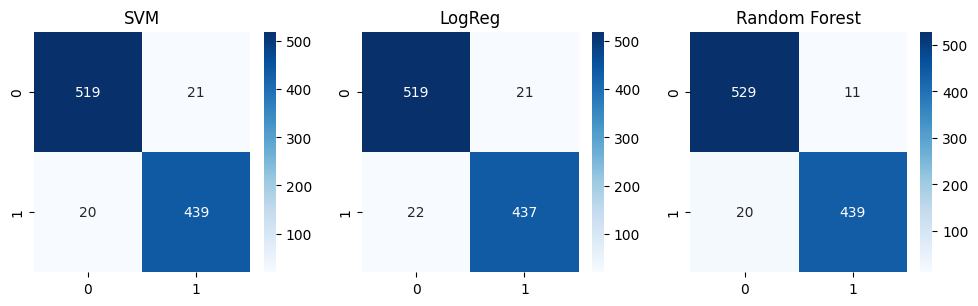

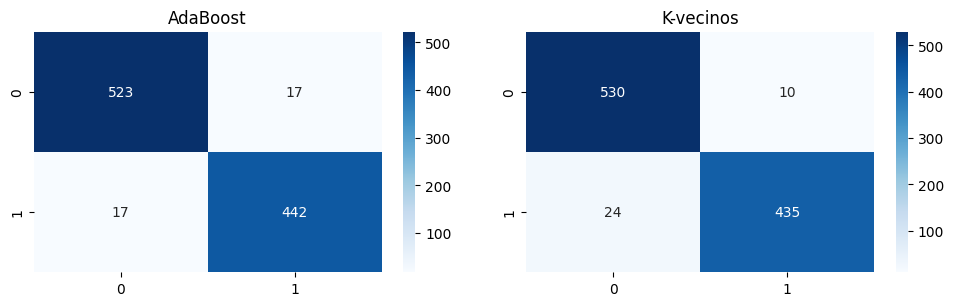

In [ ]:
import seaborn as sns
fig1, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig1.tight_layout()
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig2.tight_layout()

cm_svm = confusion_matrix(y_test,  y_pred_svm)
cm_logreg = confusion_matrix(y_test,  y_pred_logreg)
cm_forest = confusion_matrix(y_test,  y_pred_forest)
cm_AdaBoost = confusion_matrix(y_test,  y_pred_AdaBoost)
cm_knn = confusion_matrix(y_test,  y_pred_knn)


titles = ['SVM', 'LogReg', 'Random Forest']

for indx, matriz in enumerate([cm_svm, cm_logreg, cm_forest]):
    sns.heatmap(matriz, annot=True, cmap='Blues', fmt='d', ax = ax1[indx])
    ax1[indx].set_title(titles[indx])

titles = ['AdaBoost', 'K-vecinos']

for indx, matriz in enumerate([cm_AdaBoost, cm_knn]):
    sns.heatmap(matriz, annot=True, cmap='Blues', fmt='d', ax = ax2[indx])
    ax2[indx].set_title(titles[indx])


In [ ]:
train_score_svm = svm_clf.score(X_train, y_train)
test_score_svm = svm_clf.score(X_test, y_test)

print('svm training score: {:.3f}'.format( train_score_svm))
print('svm test score: {:.3f}'.format( test_score_svm))

print('#========================================')
train_score_logreg = logreg_clf.score(X_train, y_train)
test_score_logreg = logreg_clf.score(X_test, y_test)

print('logreg training score: {:.3f}'.format( train_score_logreg))
print('logreg test score: {:.3f}'.format( test_score_logreg))

print('#========================================')
train_score_forest = ensemble.score(X_train, y_train)
test_score_forest = ensemble.score(X_test, y_test)

print('forest training score: {:.3f}'.format( train_score_forest))
print('forest test score: {:.3f}'.format( test_score_forest))

print('#========================================')
train_score_AdaBoost = AdaBoost_clf.score(X_train, y_train)
test_score_AdaBoost = AdaBoost_clf.score(X_test, y_test)

print('AdaBoost training score: {:.3f}'.format( train_score_AdaBoost))
print('AdaBoost test score: {:.3f}'.format( test_score_AdaBoost))

print('#========================================')

train_score_knn = knn_clf.score(X_train, y_train)
test_score_knn = knn_clf.score(X_test, y_test)

print('knn training score: {:.3f}'.format( train_score_knn))
print('knn test score: {:.3f}'.format( test_score_knn))


svm training score: 0.960
svm test score: 0.959
#========================================
logreg training score: 0.959
logreg test score: 0.957
#========================================
forest training score: 0.979
forest test score: 0.969
#========================================
AdaBoost training score: 0.968
AdaBoost test score: 0.966
#========================================
knn training score: 0.971
knn test score: 0.966


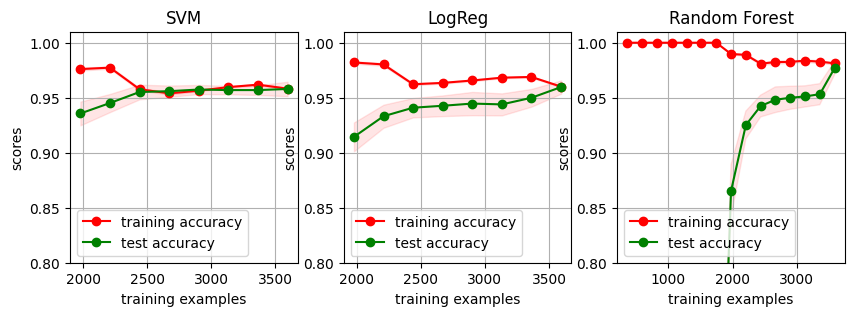

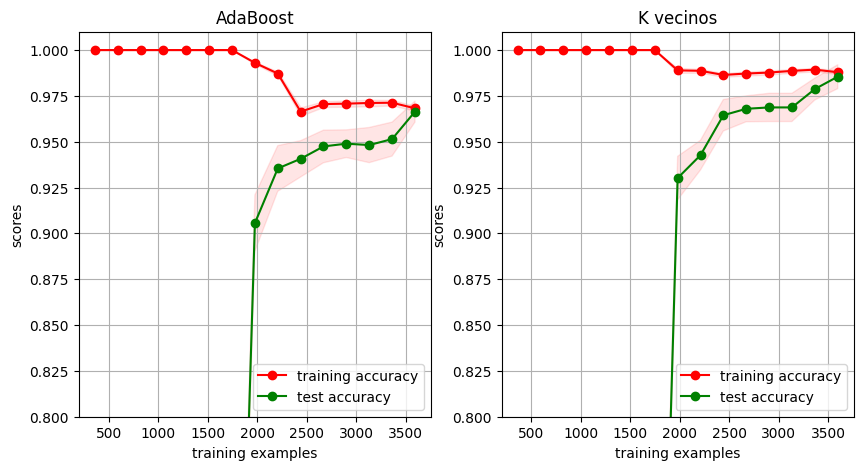

In [ ]:
fig, axes = plt.subplots(1,3, figsize= (10,3))


titles = ['SVM', 'LogReg', 'Random Forest']

for indx , model in enumerate([svm_clf , logreg_clf, ensemble]):

    plot_learning_curve(model, titles[indx], X,y, axes=[axes[indx]], ylim=(0.8,1.01), cv = kfold,
                        n_jobs = 4, scoring = 'accuracy', label = 'accuracy')

fig, axes = plt.subplots(1,2, figsize = (10,5))

titles = ['AdaBoost', 'K vecinos']

for indx , model in enumerate([AdaBoost_clf , knn_clf]):

    plot_learning_curve(model, titles[indx], X,y, axes=[axes[indx]], ylim=(0.8,1.01), cv = kfold,
                        n_jobs = 4, scoring = 'accuracy', label='accuracy' )





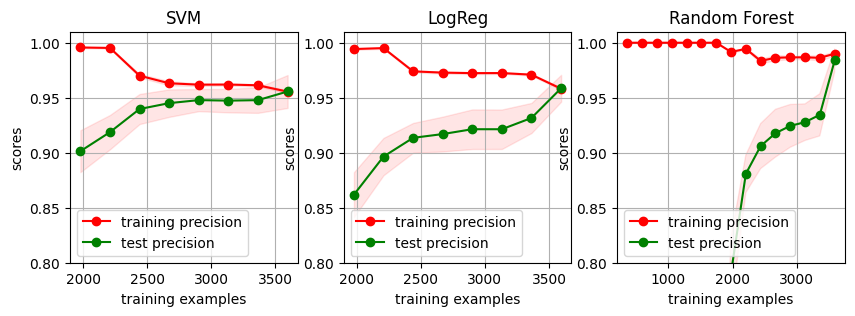

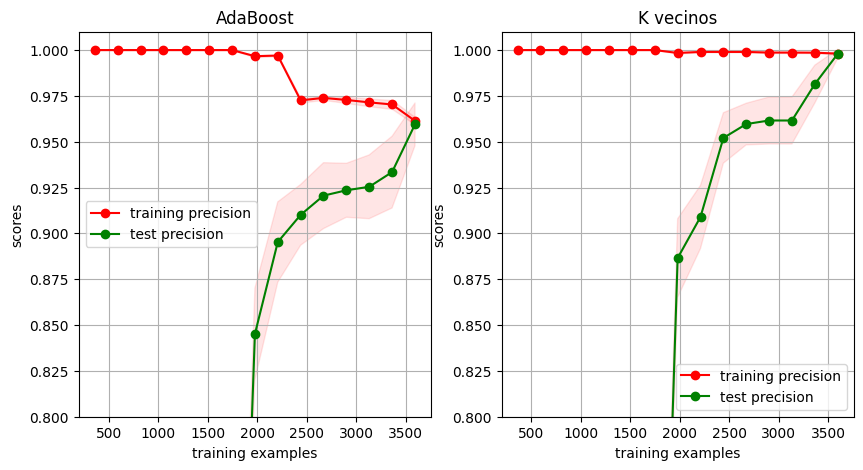

In [ ]:
fig, axes = plt.subplots(1,3, figsize= (10,3))


titles = ['SVM', 'LogReg', 'Random Forest']

for indx , model in enumerate([svm_clf , logreg_clf, ensemble]):

    plot_learning_curve(model, titles[indx],
                        X_trainval,y_trainval,
                        axes=[axes[indx]],
                        ylim=(0.8,1.01),
                        cv = kfold,
                        n_jobs = 4,
                        scoring = 'precision',
                        label = 'precision'
                       )

fig, axes = plt.subplots(1,2, figsize = (10,5))

titles = ['AdaBoost', 'K vecinos']

for indx , model in enumerate([AdaBoost_clf , knn_clf]):

    plot_learning_curve(model,
                        titles[indx],
                        X_trainval,
                        y_trainval,
                        axes=[axes[indx]],
                        ylim=(0.8,1.01),
                        cv = kfold,
                        n_jobs = 4,
                        scoring = 'precision',
                        label = 'precision'
                       )



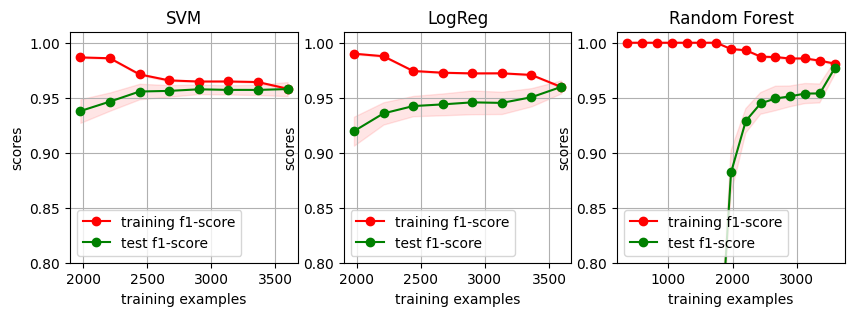

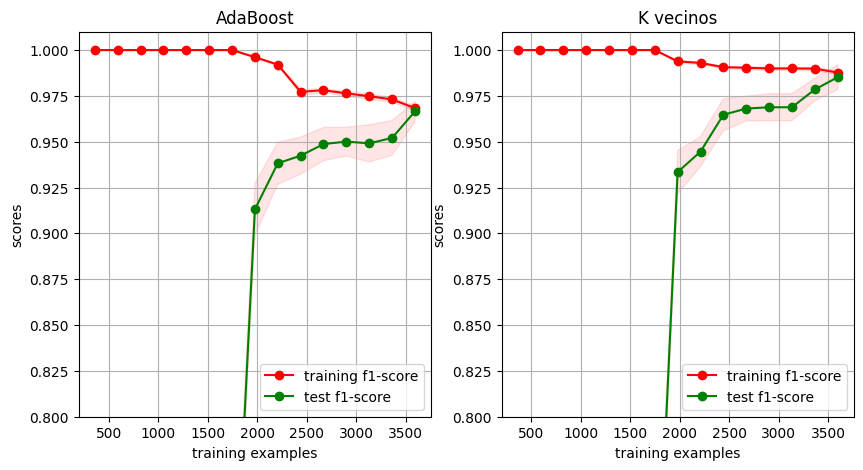

In [ ]:
fig, axes = plt.subplots(1,3, figsize= (10,3))


titles = ['SVM', 'LogReg', 'Random Forest']

for indx , model in enumerate([svm_clf , logreg_clf, ensemble]):

    plot_learning_curve(model, titles[indx],
                        X_trainval,y_trainval,
                        axes=[axes[indx]],
                        ylim=(0.8,1.01),
                        cv = kfold,
                        n_jobs = 4,
                        scoring = 'f1',
                        label = 'f1-score'
                       )

fig, axes = plt.subplots(1,2, figsize = (10,5))

titles = ['AdaBoost', 'K vecinos']

for indx , model in enumerate([AdaBoost_clf , knn_clf]):

    plot_learning_curve(model,
                        titles[indx],
                        X_trainval,
                        y_trainval,
                        axes=[axes[indx]],
                        ylim=(0.8,1.01),
                        cv = kfold,
                        n_jobs = 4,
                        scoring = 'f1',
                        label = 'f1-score'
                       )


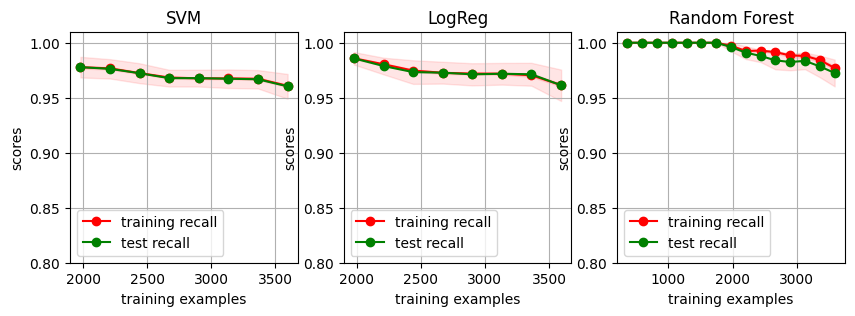

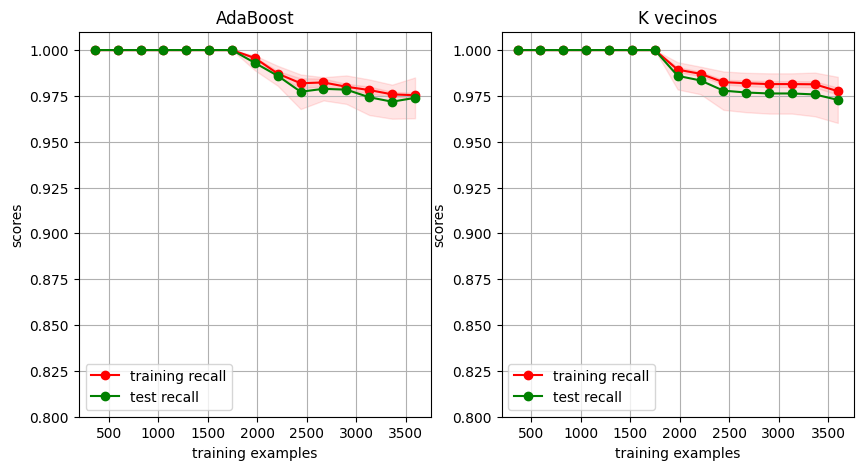

In [ ]:
fig, axes = plt.subplots(1,3, figsize= (10,3))


titles = ['SVM', 'LogReg', 'Random Forest']

for indx , model in enumerate([svm_clf , logreg_clf, forest_clf]):

    plot_learning_curve(model, titles[indx],
                        X_trainval,y_trainval,
                        axes=[axes[indx]],
                        ylim=(0.8,1.01),
                        cv = kfold,
                        n_jobs = 4,
                        scoring = 'recall',
                        label = 'recall'
                       )

fig, axes = plt.subplots(1,2, figsize = (10,5))

titles = ['AdaBoost', 'K vecinos']

for indx , model in enumerate([AdaBoost_clf , knn_clf]):

    plot_learning_curve(model,
                        titles[indx],
                        X_trainval,
                        y_trainval,
                        axes=[axes[indx]],
                        ylim=(0.8,1.01),
                        cv = kfold,
                        n_jobs = 4,
                        scoring = 'recall',
                        label = 'recall'
                       )
